In [11]:
import os
import geopandas as gpd
import pandas as pd

In [2]:
%load_ext autoreload
import icebath as icebath
from icebath.core import bathy_workflow
%autoreload 2

In [ ]:
# import dask
# from dask.distributed import Client, LocalCluster
# client = Client(processes=False) #, n_workers=2, threads_per_worker=3, memory_limit='6GB')
# client

In [3]:
# set up variables to run
inpardir = '/Users/jessica/projects/bathymetry_from_bergs/DEMs/2m/'
fjord = 'JI'
metastr='_mdf'

# inpardir = '/Users/jessica/projects/bathymetry_from_bergs/DEMs/Kane01/'
# fjord="KB"
# metastr="_meta"

outdir = "/Users/jessica/projects/bathymetry_from_bergs/results/"

In [4]:
dirlist = [d for d in os.listdir(inpardir) if not d.startswith('.')]

/Users/jessica/projects/bathymetry_from_bergs/github/icebath/icebath/core/build_xrds.py:21: UserWarning: This function currently assumes a constant grid and EPSG for all input files
  warnings.warn("This function currently assumes a constant grid and EPSG for all input files")


SETSM_W1W2_20100814_102001000ECB6B00_1030010006220900_seg1_2m_v3.0_dem.tif
SETSM_WV02_20160903_103001005B81C700_103001005C44F300_seg1_2m_v3.0_dem.tif
SETSM_GE01_20120629_1050410000D4F700_1050410000C40800_seg1_2m_v3.0_dem.tif
Please note the transform is computed assuming a coordinate reference system where x(min) is west and y(min) is south
Note that the new file is reprojected to have the same CRS as the dataset to which it is being added.        However, if the two CRSs are compatible, the spatial properties of the new file may be added to or overwrite the ones of the existing dataset
Note that tide model and epsg are hard coded in!
They can also be provided as keywords if the wrapper function is updated to handle them
going to enter the rasterize function
NOT USING DASK
Got labeled raster of potential icebergs for an image
done rasterizing and getting possible icebergs
6
4
Generated geodataframe of icebergs for this image
going to enter the rasterize function
NOT USING DASK
Got labe

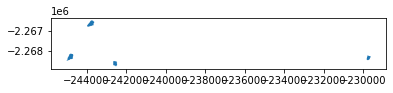

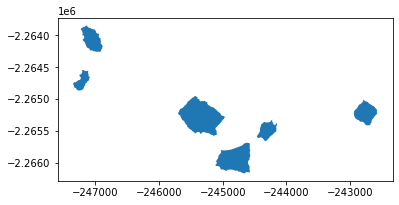

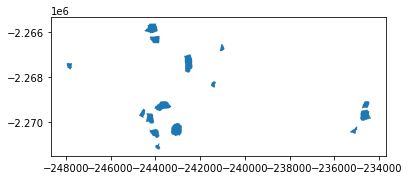

In [20]:
# run the bathymetry-from-iceberg-freeboard workflow on each dem (skipping larger dirs for now)
for indir in dirlist:
#     print(indir)
    try:
        if os.path.getsize(inpardir+indir) < 750:
            bathy_workflow.run_workflow(inpardir+indir+'/', fjord, outdir, indir[5:14] + "icebergs.gpkg", metastr=metastr)
        else:
            continue
    except NotADirectoryError:
        if os.path.getsize(inpardir) <750:
            bathy_workflow.run_workflow(inpardir+'/', fjord, outdir, "JIicebergs.gpkg", metastr=metastr)
            break
        else:
            continue        

In [21]:
reslist = [f for f in os.listdir(outdir) if f.endswith('.gpkg')]

In [22]:
print(reslist)

['JIicebergs.gpkg', '20140710_icebergs.gpkg']


In [23]:
# combine the geopackages into one geodataframe
gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(outdir+res) for res in reslist],
                                 ignore_index=True), crs=gpd.read_file(outdir+reslist[0]).crs)

In [27]:
gdf

,sl_adjust,fjord,date,tidal_ht_offset,tidal_ht_min,tidal_ht_max,filtered_draft_med,filtered_draft_max,filtered_draft_mad,filtered_draft_err,bmach_bed,bmach_errbed,bmach_source,ibcao_bed,ibcao_source,geometry
0,6.640982,JI,2010-08-14T15:35:06,0.738320,-1.038866,0.887763,188.772,305.59,71.3905,34.9224,-321.103,2,30,-321.904,11,"POLYGON ((-243974.000 -2266723.337, -243974.00..."
1,7.286486,JI,2010-08-14T15:35:06,0.738320,-1.038866,0.887763,99.3726,184.344,36.5368,19.737,-581.841,300,3,-618.762,70,"POLYGON ((-229826.000 -2268428.102, -229826.04..."
2,6.652772,JI,2010-08-14T15:35:06,0.738320,-1.038866,0.887763,140.758,258.792,60.3247,26.6414,-274.2,2,32,-278.152,14.6166,"POLYGON ((-245020.804 -2268491.000, -245019.85..."
3,7.801522,JI,2010-08-14T15:35:06,0.738320,-1.038866,0.887763,108.228,210.844,33.4033,21.1846,-440.044,200,4,-432.796,70,"POLYGON ((-242656.000 -2268511.069, -242655.80..."
4,5.242953,JI,2016-09-03T15:46:32,0.265173,-0.980227,1.001632,225.754,393.097,56.1022,41.334,-360.579,2,30,-354.771,11,"POLYGON ((-244487.266 -2265928.937, -244486.36..."
5,5.500199,JI,2016-09-03T15:46:32,0.265173,-0.980227,1.001632,195.731,342.088,61.1241,36.0662,-336.832,2,30,-324.999,11,"POLYGON ((-244249.611 -2266322.160, -244250.36..."
6,6.464562,JI,2016-09-03T15:46:32,0.265173,-0.980227,1.001632,171.291,284.484,59.0305,31.8079,-264.08,2,30,-295.574,59.0935,"POLYGON ((-241117.820 -2266782.283, -241117.52..."
7,7.020708,JI,2016-09-03T15:46:32,0.265173,-0.980227,1.001632,99.108,175.862,24.9739,19.5661,-196.213,2,32,-195.579,11,"POLYGON ((-247932.000 -2267521.337, -247932.00..."
8,5.488927,JI,2016-09-03T15:46:32,0.265173,-0.980227,1.001632,260.041,478.668,83.8987,47.3836,-411.281,200,4,-415.899,70,"POLYGON ((-242647.000 -2267750.659, -242648.09..."
9,5.829976,JI,2016-09-03T15:46:32,0.265173,-0.980227,1.001632,127.277,187.475,49.6191,24.2551,-588.036,200,4,-595.51,70,"POLYGON ((-241512.120 -2268367.878, -241512.38..."


In [15]:
outfn = fjord + "_combined_results.gpkg"
gdf.to_file(outdir+outfn, driver="GPKG")

In [25]:
from icebath.utils import plot as ibplot

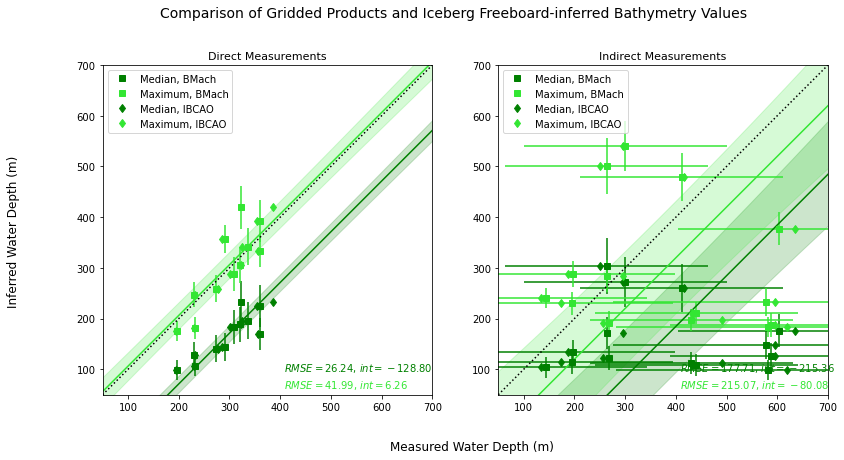

In [26]:
ibplot.meas_vs_infer_fig(gdf, save=False)